## Assignment

## datasets (with size between 5k and 30k rows) from UCI are:

* Letter Recognition – 20,000 rows, 26 classes (A–Z).
* Pen-Based Recognition of Handwritten Digits – 10,992 rows, 10 classes (0–9).
* Shuttle Dataset – 58,000 rows (too big, but subsets can be used).
* Waveform Dataset – 5,000 rows, 3 classes.
* Magic Gamma Telescope – 19,020 rows, binary class (but often treated as multi-class by modifications).

In [1]:
# import liberaries
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import random as r

### Load the data

In [2]:
data = fetch_openml(name="letter", version=1, as_frame=True)  # Letter Recognition (20k rows, 26 classes)
X, y = data.data, data.target
print(X)
print('\n',y)

       x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      4      4     3      2      7      8      2      9     11   
1          4      7      5     5      5      5      9      6      4      8   
2          7     10      8     7      4      8      8      5     10     11   
3          4      9      5     7      4      7      7     13      1      7   
4          6      7      8     5      4      7      6      3      7     10   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      5     10      5     8      3      4     10      7      8     12   
19996      4      7      6     5      3      7      8      2     10     12   
19997      4      8      4     6      4      7      8      7      4     10   
19998      4     11      4     8      3      0      2      4      6      1   
19999      5      9      6    11      6      8      7      6      3      8   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0          7 

### Scaler feature for SVM

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
kernelList = ["linear", "poly", "rbf", "sigmoid"]
results = []
all_histories = {}

In [5]:
for sample_num in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=True, random_state=sample_num
    )

    best_acc = 0
    best_params = None
    history = []

    for i in range(100):
        k = r.choice(kernelList)
        C = r.uniform(0.1, 10)
        gamma = r.choice(["scale", "auto"])
        eps = r.random()

        try:
            clf = SVC(kernel=k, C=C, gamma=gamma)
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
            acc = accuracy_score(y_test, preds)
        except Exception as e:
            print(f"Iteration {i} failed: {e}")
            acc = 0

        history.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = {
                "kernel": k,
                "C": round(C, 3),
                "gamma": gamma,
                "epsilon": round(eps, 3)
            }

    results.append([f"S{sample_num}", round(best_acc, 4), best_params])
    all_histories[f"S{sample_num}"] = history

### table

In [6]:
df_results = pd.DataFrame(results, columns=["Sample #", "Best Accuracy", "Best SVM Parameters"])
print("\nTable 1: Comparative performance of Optimized-SVM\n")
print(df_results)


Table 1: Comparative performance of Optimized-SVM

  Sample #  Best Accuracy                                Best SVM Parameters
0       S1         0.9678  {'kernel': 'rbf', 'C': 8.054, 'gamma': 'scale'...
1       S2         0.9425  {'kernel': 'poly', 'C': 6.296, 'gamma': 'auto'...
2       S3         0.9512  {'kernel': 'rbf', 'C': 1.626, 'gamma': 'auto',...
3       S4         0.9647  {'kernel': 'rbf', 'C': 9.645, 'gamma': 'scale'...
4       S5         0.9682  {'kernel': 'rbf', 'C': 8.836, 'gamma': 'scale'...
5       S6         0.9657  {'kernel': 'rbf', 'C': 9.255, 'gamma': 'auto',...
6       S7         0.9702  {'kernel': 'rbf', 'C': 8.353, 'gamma': 'auto',...
7       S8         0.9625  {'kernel': 'rbf', 'C': 3.521, 'gamma': 'scale'...
8       S9         0.9633  {'kernel': 'rbf', 'C': 6.364, 'gamma': 'auto',...
9      S10         0.9657  {'kernel': 'rbf', 'C': 5.705, 'gamma': 'scale'...


### Graph

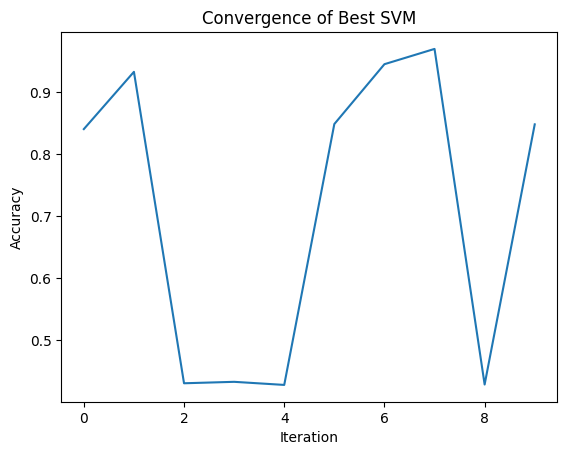

In [8]:
best_sample = df_results.loc[df_results["Best Accuracy"].idxmax()]
best_history = all_histories[best_sample["Sample #"]]

plt.plot(best_history)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Convergence of Best SVM")
plt.show()